In [1]:
# Creating CSV file

import csv
suspects = ["muqeem", "ashir", "salman"]
locations = {"muqeem": "library", "ashir": "library", "salman": "cinema"}
motives = {"muqeem": "robbery"}
weapons = {"muqeem": "pistol", "ashir": "rifle"}
evidence = {"muqeem": "fingerprint"}

with open("suspects_full.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["name", "place", "motive", "weapon", "evidence"])
    for s in suspects:
        writer.writerow([
            s,
            locations.get(s, ""),
            motives.get(s, ""),
            weapons.get(s, ""),
            evidence.get(s, "")
        ])


In [12]:
# Extracting people at the library

import pandas as pd

df = pd.read_csv("suspects_full.csv")
library_df = df[df["place"] == "library"]
print(library_df["name"])
            

0    muqeem
1     ashir
Name: name, dtype: object


In [4]:
# Grouping by weapon counts

weapon_counts = df["weapon"].value_counts()
print(weapon_counts)

weapon
pistol    1
rifle     1
Name: count, dtype: int64


In [11]:
# Grouping by motive

grouped = df.groupby("motive")["name"].apply(list)
print(grouped)

motive
robbery    [muqeem]
Name: name, dtype: object


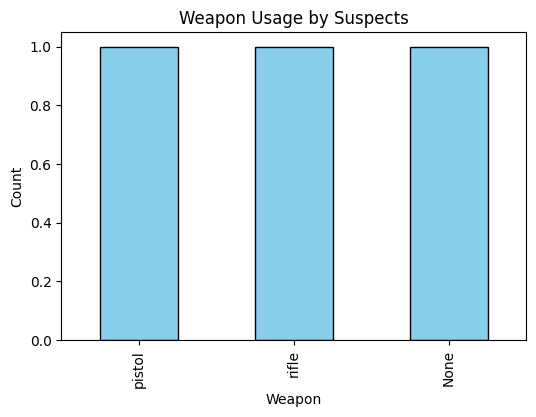

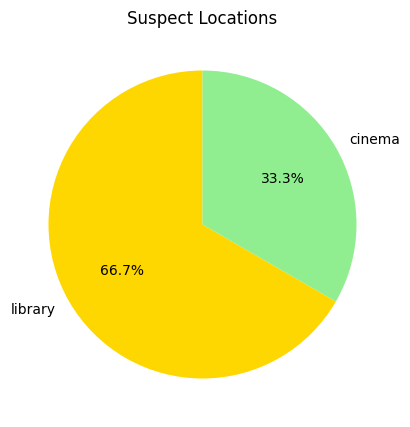

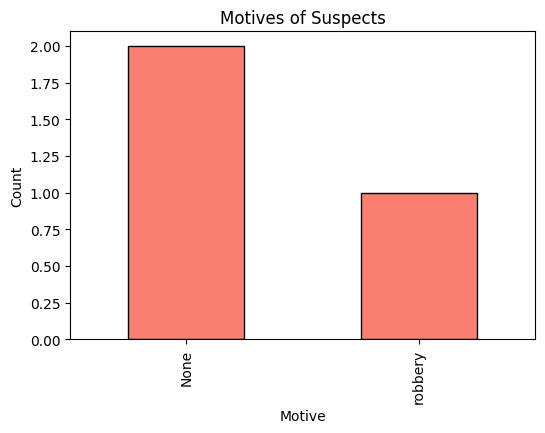

In [13]:
# Visualisation 

import matplotlib.pyplot as plt

weapon_counts = df["weapon"].fillna("None").value_counts()
plt.figure(figsize=(6,4))
weapon_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Weapon Usage by Suspects")
plt.xlabel("Weapon")
plt.ylabel("Count")
plt.show()

location_counts = df["place"].fillna("Unknown").value_counts()
plt.figure(figsize=(5,5))
location_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["gold","lightgreen","lightcoral"])
plt.title("Suspect Locations")
plt.ylabel("")  # remove y-label
plt.show()

motive_counts = df["motive"].fillna("None").value_counts()
plt.figure(figsize=(6,4))
motive_counts.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Motives of Suspects")
plt.xlabel("Motive")
plt.ylabel("Count")
plt.show()